In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Lihat 5 data teratas untuk konfirmasi
df.head()
# Crosstab jumlah produk berdasarkan kategori dan status best-seller
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Tampilkan 10 kategori teratas berdasarkan total jumlah produk
crosstab['total'] = crosstab[False] + crosstab[True]
crosstab = crosstab.sort_values(by='total', ascending=False)
crosstab.head(10)

isBestSeller,False,True,total
category,,,
Sports & Outdoors,835935,330,836265
Beauty,19010,302,19312
"Handmade Clothing, Shoes & Accessories",19215,14,19229
Bath & Body,19059,33,19092
Birthday Gifts,18943,35,18978
Manicure & Pedicure Products,18882,58,18940
Skin Care,18711,58,18769
Make-up,18715,41,18756
Hair Care,18665,70,18735


In [2]:
# Hitung proporsi best-seller per kategori
crosstab['best_seller_ratio'] = crosstab[True] / crosstab['total']

# Tampilkan 10 kategori teratas berdasarkan rasio best-seller tertinggi
crosstab.sort_values(by='best_seller_ratio', ascending=False).head(10)

isBestSeller,False,True,total,best_seller_ratio
category,,,,
Grocery,9008,556,9564,0.058135
Smart Home Security & Lighting,98,6,104,0.057692
Health & Personal Care,9017,552,9569,0.057686
Mobile Phone Accessories,248,11,259,0.042471
Power & Hand Tools,8353,306,8659,0.035339
"Billiard, Snooker & Pool",241,8,249,0.032129
Pet Supplies,9152,285,9437,0.030200
Home Brewing & Wine Making,239,7,246,0.028455
Wind Instruments,243,7,250,0.028000


In [3]:
!pip install scipy
from scipy.stats import chi2_contingency
import numpy as np

# Chi-square test
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['category'], df['isBestSeller']))

chi2, p, dof

(36540.20270061387, 0.0, 295)

In [8]:
# Hitung Cramér's V
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Buat confusion matrix lagi
conf_matrix = pd.crosstab(df['category'], df['isBestSeller'])

# Hitung Cramér's V
cramers_v_value = cramers_v(conf_matrix)
cramers_v_value

0.1222829439760564

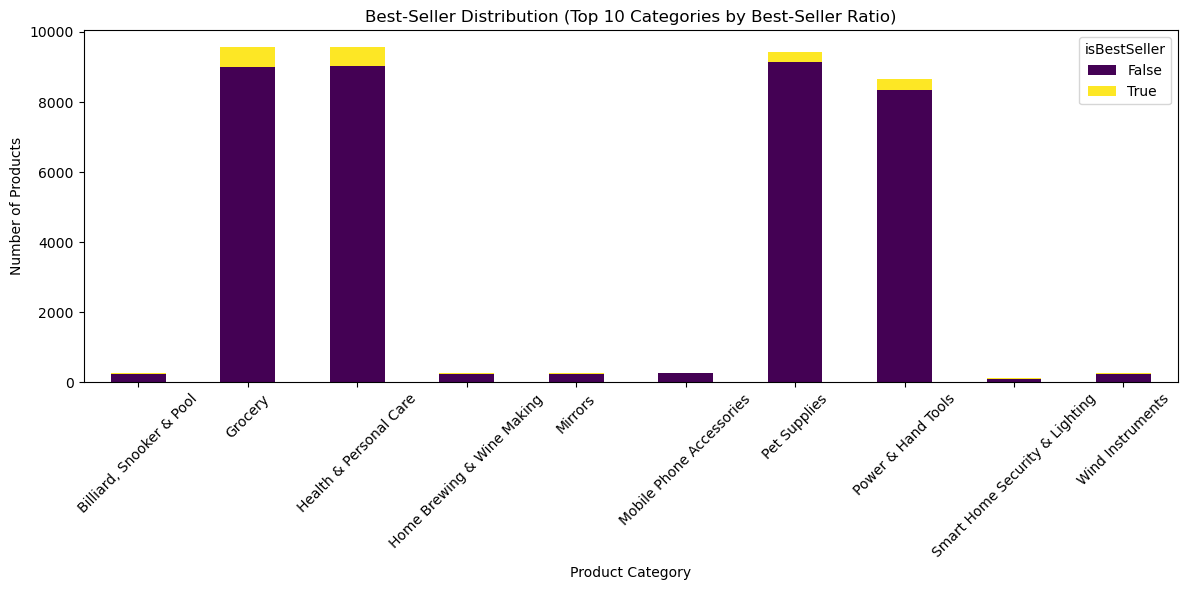

In [12]:
# Ambil 10 kategori dengan rasio best-seller tertinggi
top_best_seller = crosstab.sort_values(by='best_seller_ratio', ascending=False).head(10).index
df_top_ratio = df[df['category'].isin(top_best_seller)]

# Buat crosstab baru
stacked_ratio = pd.crosstab(df_top_ratio['category'], df_top_ratio['isBestSeller'])

# Plot ulang
stacked_ratio.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Best-Seller Distribution (Top 10 Categories by Best-Seller Ratio)')
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.legend(title='isBestSeller')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

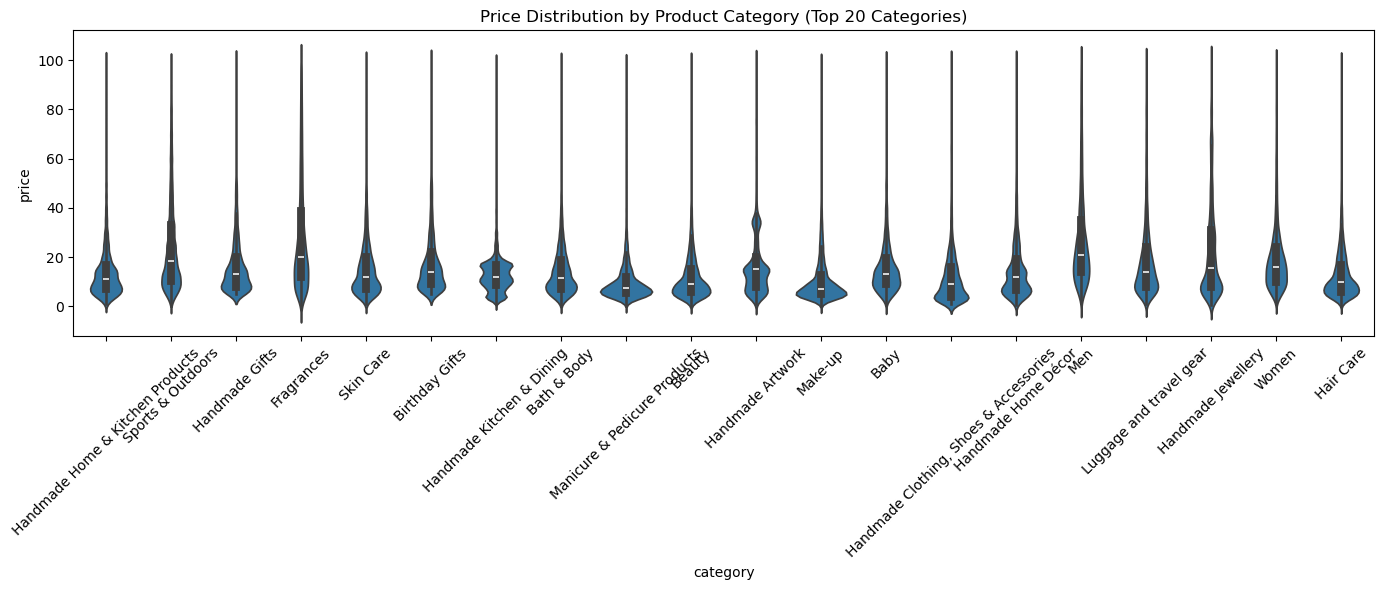

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil 20 kategori teratas berdasarkan jumlah produk
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Buat violin plot
plt.figure(figsize=(14, 6))
sns.violinplot(x='category', y='price', data=df_top20)
plt.xticks(rotation=45)
plt.title('Price Distribution by Product Category (Top 20 Categories)')
plt.tight_layout()
plt.show()

C:\Users\Heri Soesanto\AppData\Local\Temp\ipykernel_23332\3671583446.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_category.values, y=avg_price_per_category.index, palette='mako')


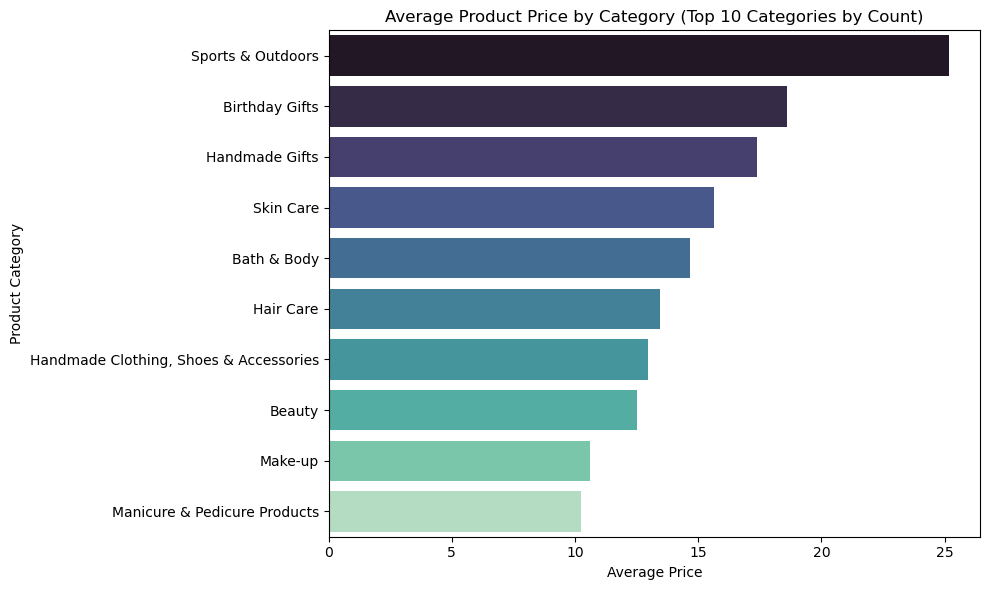

In [20]:
# Hitung 10 kategori teratas berdasarkan jumlah data
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

# Filter dataframe hanya untuk kategori tersebut
df_top10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Hitung rata-rata harga per kategori
avg_price_per_category = df_top10.groupby('category')['price'].mean().sort_values(ascending=False)

# Visualisasikan dengan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_category.values, y=avg_price_per_category.index, palette='mako')
plt.title('Average Product Price by Category (Top 10 Categories by Count)')
plt.xlabel('Average Price')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()

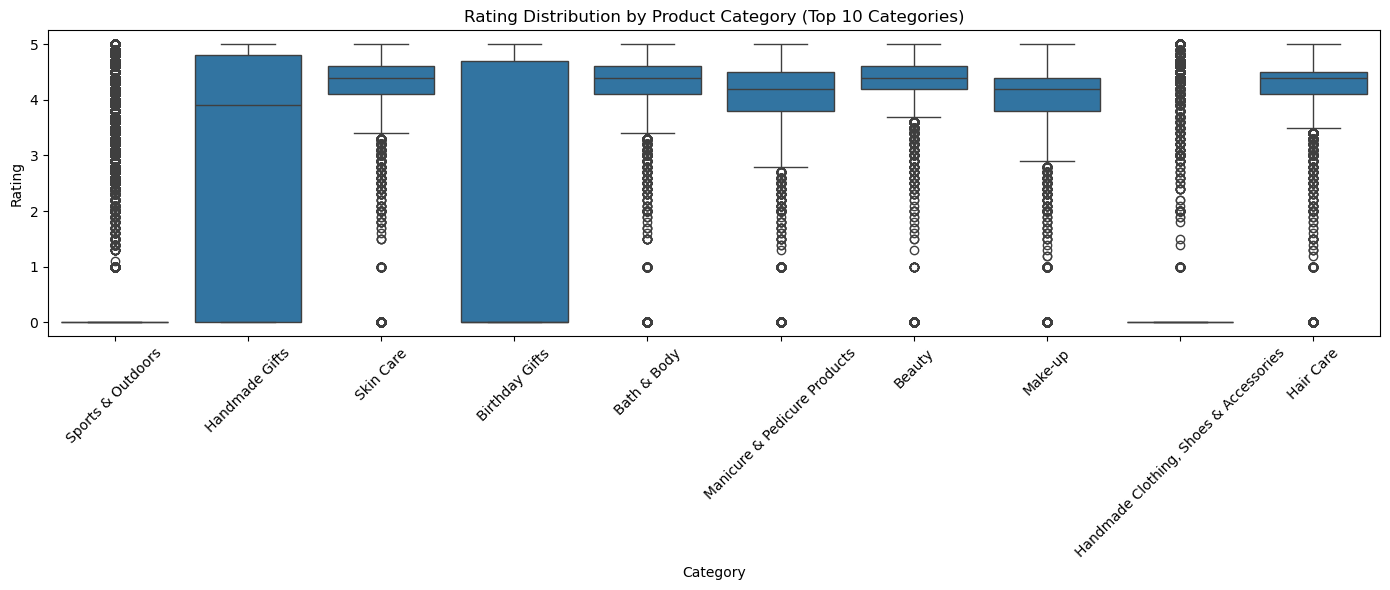

In [22]:
# Hitung 10 kategori terbanyak (berdasarkan jumlah data)
top_10_categories = df_no_outliers['category'].value_counts().head(10).index

# Filter data untuk hanya kategori tersebut
df_top10_rating = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Buat box plot
plt.figure(figsize=(14, 6))
sns.boxplot(x='category', y='stars', data=df_top10_rating)
plt.title('Rating Distribution by Product Category (Top 10 Categories)')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Correlation coefficient antara price dan stars
correlation = df_no_outliers[['price', 'stars']].corr()
correlation

,price,stars
price,1.000000,-0.077673
stars,-0.077673,1.000000


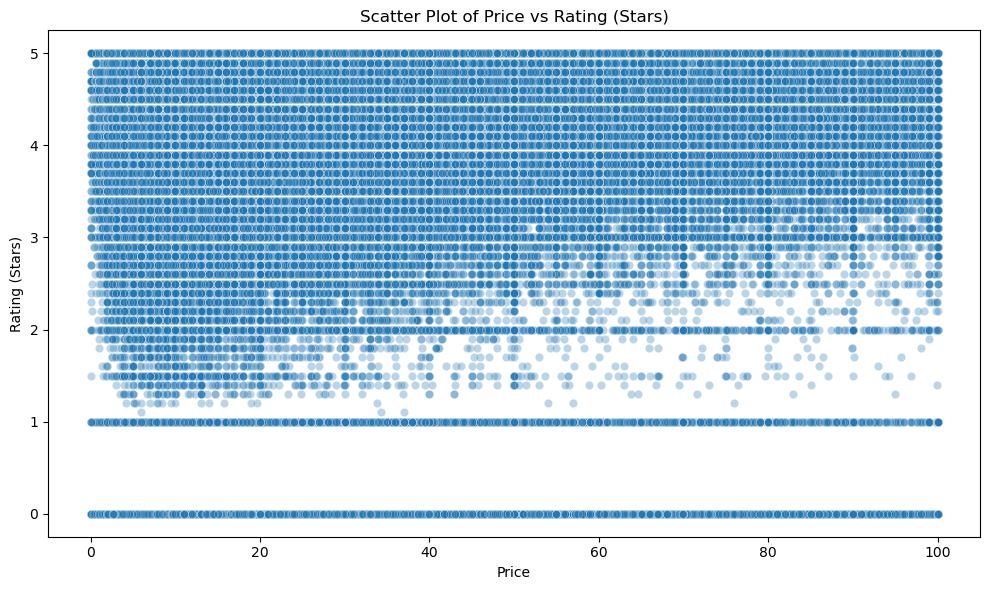

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Buat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df_no_outliers, alpha=0.3)

plt.title('Scatter Plot of Price vs Rating (Stars)')
plt.xlabel('Price')
plt.ylabel('Rating (Stars)')
plt.tight_layout()
plt.show()

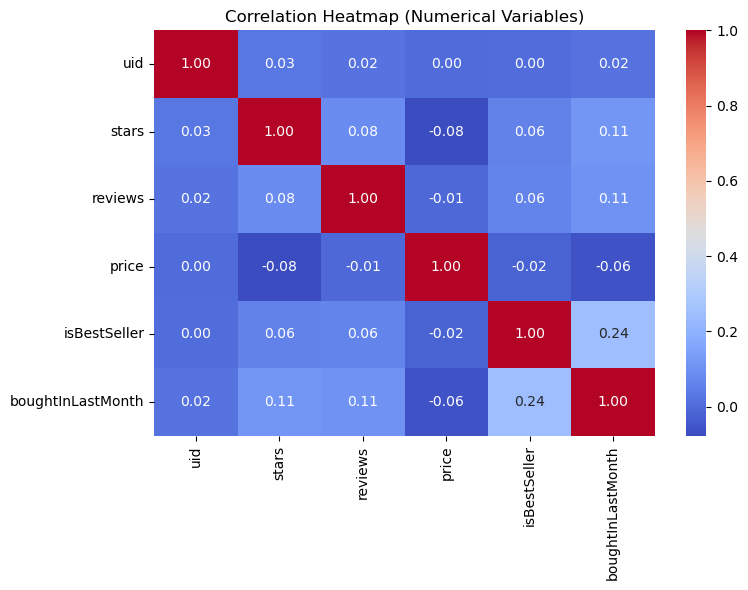

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_no_outliers.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Numerical Variables)')
plt.tight_layout()
plt.show()

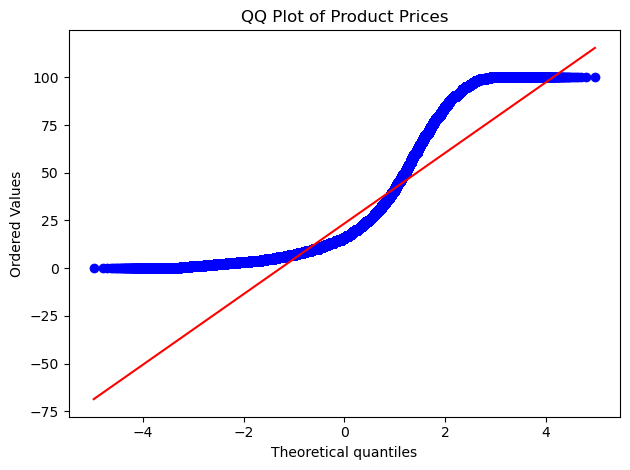

In [30]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Buat QQ plot untuk price
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title("QQ Plot of Product Prices")
plt.tight_layout()
plt.show()